In [1]:
import pandas as pd

In [45]:
# 0. 데이터 불러오기
df = pd.read_csv("stroke.csv")

In [46]:
# 1. 행/열 개수 확인
n_rows, n_cols = df.shape
print("✅ 데이터 크기 확인")
print(f"- 행(사람 수): {n_rows}")
print(f"- 열(변수 수): {n_cols}\n")

✅ 데이터 크기 확인
- 행(사람 수): 5110
- 열(변수 수): 12



In [47]:
# 2. 결측치(빈값) 확인
# isna() 결측 여부(True/False) 판단
# sum()으로 변수별 결측 개수 측정
missing_count = df.isna().sum()
# 결측 비율(%) = 결측 개수 / 전체 행 수
missing_ratio = (missing_count / n_rows * 100).round(2)

print("✅ 변수별 결측치 현황")
missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_ratio(%)": missing_ratio
})
print(missing_summary, "\n")

✅ 변수별 결측치 현황
                   missing_count  missing_ratio(%)
id                             0               0.0
gender                         0               0.0
age                            0               0.0
hypertension                   0               0.0
heart_disease                  0               0.0
ever_married                   0               0.0
work_type                      0               0.0
Residence_type                 0               0.0
avg_glucose_level              0               0.0
bmi                            0               0.0
smoking_status                 0               0.0
stroke                         0               0.0 



In [48]:
# 3. 타깃 비율 확인 (class imbalance)
target_col = "stroke"

print("✅ 타깃 분포 (뇌졸중 vs 비뇌졸중)")
# value_counts()로 각 클래스 개수, normalize=True로 비율(%) 확인
class_count = df[target_col].value_counts().sort_index()  # 0,1 순으로 보기
class_ratio = (df[target_col].value_counts(normalize=True)
               .sort_index() * 100).round(2)

target_summary = pd.DataFrame({
    "count": class_count,
    "ratio(%)": class_ratio
})

print(target_summary)
print("\n⚠️ stroke=1 비율이 매우 낮음 → '불균형 데이터'로 볼 수 있음")
print("⚠️ 결론 해석 유의")



✅ 타깃 분포 (뇌졸중 vs 비뇌졸중)
        count  ratio(%)
stroke                 
0        4861     95.13
1         249      4.87

⚠️ stroke=1 비율이 매우 낮음 → '불균형 데이터'로 볼 수 있음
⚠️ 결론 해석 유의


# 유의 사항
- Stroke = 1이 5%
    - 전부 '0'이라고 예측해도 정확도가 95%가 나올 수 있음.
        - 정확도 사용 금지
            - 사용 추천
            - Recall
            - F1-score
            - AUROC
            - AUPRC
- 불균형 해결 방법 생각
    - 데이터 레벨 접근
        - Oversampling (SMOTE 등등)
        - Undersampling
        - Class weight 적용
    - 모델 레벨 접근
        - Logistic Regression
            - class_weight = 'balanced'
        - Random Forest, XGBoost
            - class_weight, scale_pos_weight 조정

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# 4-0 숫자형 변수 목록
num_cols = ["age", "avg_glucose_level", "bmi"]

# 4-0 범주형 변수 목록
cat_cols = ["gender", "hypertension", "heart_disease", 
            "ever_married", "work_type", "Residence_type", 
            "smoking_status"]

In [51]:
# 4-1 숫자형 변수: 기초 기술 통계 확인
print("✅ 숫자형 변수 기초 통계")
print(df[num_cols].describe())   # mean, std, min, max 등 한번에 출력
print("\n")

✅ 숫자형 변수 기초 통계
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.862035
std      22.612647          45.283560     7.699562
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000




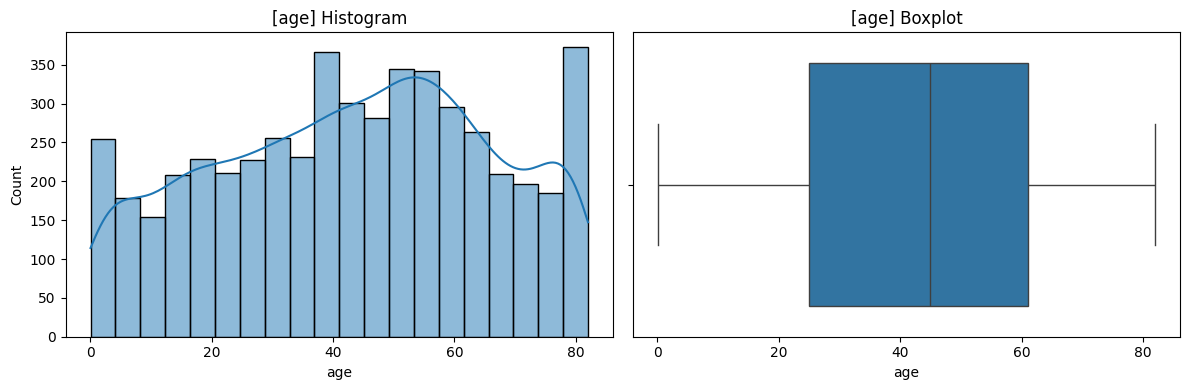

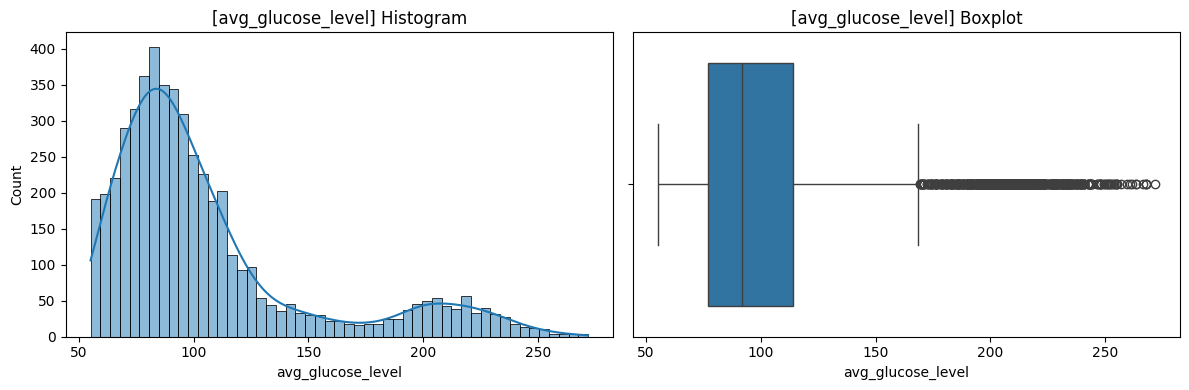

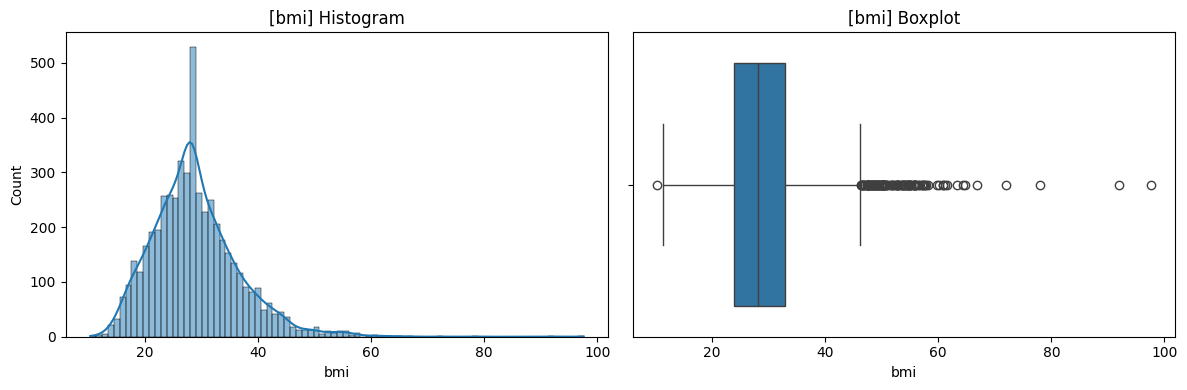

In [52]:
# 4-2 숫자형 변수: 히스토그램 / 박스플롯
for col in num_cols:
    plt.figure(figsize=(12,4))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"[{col}] Histogram")  # 분포 전체 형태 파악하기 좋음
    
    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"[{col}] Boxplot")    # 이상치(outlier) 확인하기 좋음
    
    plt.tight_layout()
    plt.show()

In [53]:
# 4-3. 범주형 변수: 빈도수 & 비율
for col in cat_cols:
    print(f"✅ 범주형 변수: {col}")
    
    # value_counts(): 빈도
    # normalize=True: 비율(%)까지 계산
    freq = df[col].value_counts()
    ratio = df[col].value_counts(normalize=True).round(3) * 100
    
    summary = pd.DataFrame({"count": freq, "ratio(%)": ratio})
    print(summary)
    print("\n")

✅ 범주형 변수: gender
        count  ratio(%)
gender                 
1        2994      58.6
0        2115      41.4
3           1       0.0


✅ 범주형 변수: hypertension
              count  ratio(%)
hypertension                 
0              4612      90.3
1               498       9.7


✅ 범주형 변수: heart_disease
               count  ratio(%)
heart_disease                 
0               4834      94.6
1                276       5.4


✅ 범주형 변수: ever_married
              count  ratio(%)
ever_married                 
1              3353      65.6
0              1757      34.4


✅ 범주형 변수: work_type
           count  ratio(%)
work_type                 
0           2925      57.2
1            819      16.0
3            687      13.4
2            657      12.9
4             22       0.4


✅ 범주형 변수: Residence_type
                count  ratio(%)
Residence_type                 
0                2596      50.8
1                2514      49.2


✅ 범주형 변수: smoking_status
                count  ratio(%

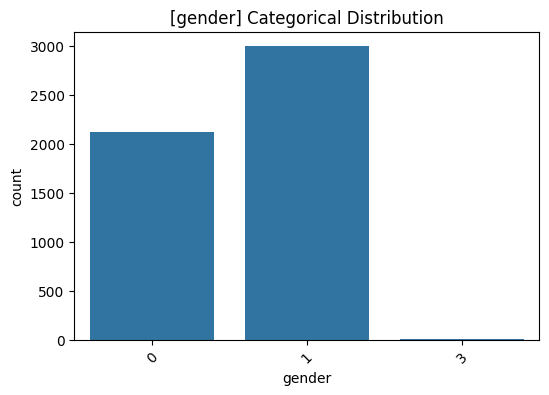

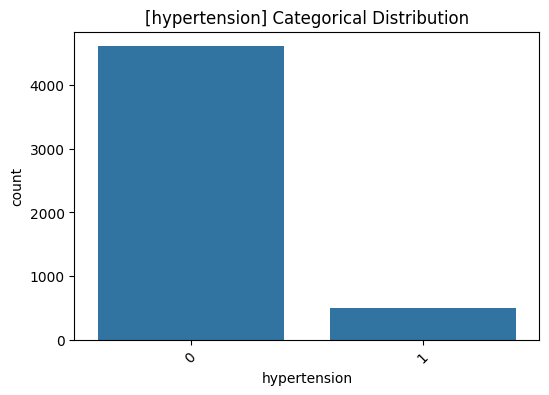

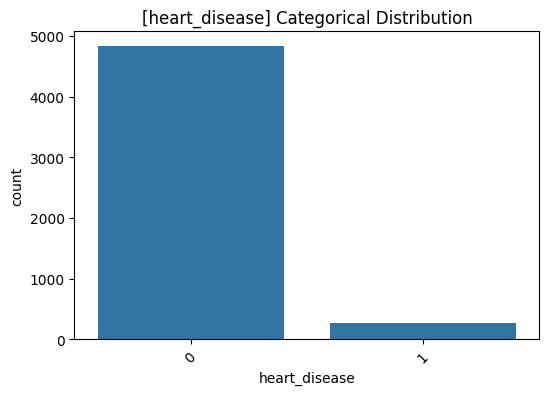

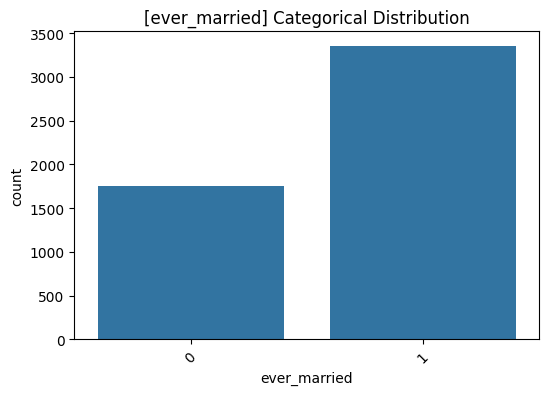

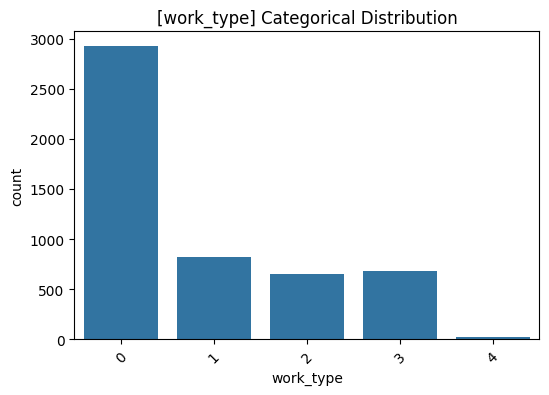

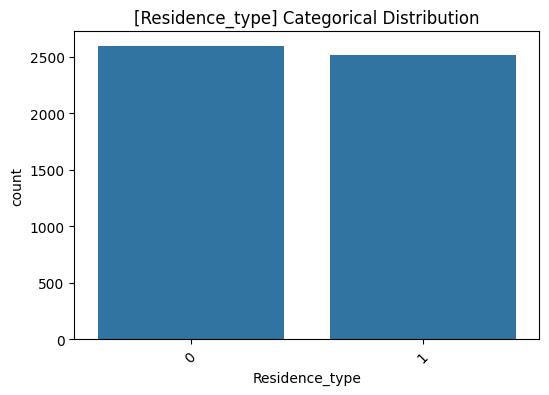

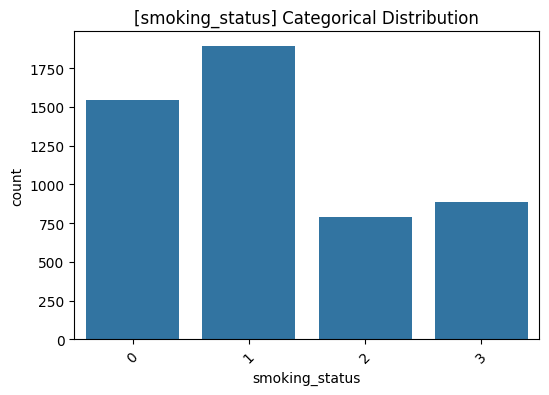

In [54]:
# 4-4 범주형 변수: 막대그래프
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"[{col}] Categorical Distribution")
    plt.xticks(rotation=45)  # 범주명이 길 때 보기 좋게
    plt.show()


# 숫자형
## 결과 내용
- age
    - 분포가 고르게 퍼져 있음
        - 특정 연령대 쏠림 없음
            - 평균: 43.2세, 중앙값: 45세
                - 어른이 많지만 어린 연령도 포함 되어 있음.
            - 히스토그램: 0~80대까지 비교적 고르게 분포
            - 박스 플롯: 이상치 거의 없음
- avg_glucose_level
    - Skewed right
        - 고혈당 값이 많음
            - 평균: 106.1, 중앙값: 91.9
                - 평균이 더 큼
            - 박스 플롯: outlier가 매우 많음
                - 150이상, 200 이상 고혈당 구간이 꽤 존재
- BMI
    - Skewed right
        - 평균 28.86
        - 미국에서는 BMI 60-80 넘는 사례도 의료 데이터에서 실제로 보고됨
        - stroke 위험군과도 연관이 있음
## 추가로 생각할 것
- age
    - stroke = 1이 어떤 나이대에 몰려 있는지
        - 나이는 뇌졸중에서 가장 중요한 위험 요인 중 하나
        - 그룹별 분포 비교
            - 박스 플롯
            - 바이올린 플롯
    - 0~18세는 병리학적으로 stroke 발생 원인 자체가 다름
        - adult stroke와 pediatric stroke는 완전히 다른 질병 패턴
            - age < 18을 별도 구간으로 labeling
            - storke = 1인 어린이가 있다면
                - feature importance
            - children = rare stroke signal
              - 모델이 과도하게 학습하지 않도록 주의 필요  
- avg_glucose_level
    - outlier가 많음
        - 로그 변환 고려
            - 모델 성능 개선 가능
        - 병원 데이터?
            - 고위험 집단을 뇌졸중과 연결 해볼 수 있음
        - stroke = 1 vs. stroke = 0 
            - 혈당 분포 차이 꼭 비교 해봐야 함
        - Logistic Regression: Robust Scaling 고려
- BMI
    - Logistic Regression: Robust Scaling 고려
        - 극단 BMI는 실제 의료적 위험 신호
        - but, 분포가 매우 right-skew, outlier-heavy
        - 표준 scaler 적용시 모델이 흔들릴 수 있음
        - 모델 입력 전 값 분포 확인 필수

# 범주형
## 추가로 생각할 것
- gender
    - gender별 storke 비율 비교
    - gender와 smoking_status, hypertension, heart_disease
        - interaction 체크
    - one-hot 차원 증가시
        - 과적합 여부 점검
- ever_married
    - 결혼 여부 vs age 관계
    - 결혼 여부 vs work_type 관계
    - stroke vs ever_married 단순 비율 비교
- smoking_status
    - Unknown vs age 관계 시각화 필요
    - Unknown vs stroke 비율 비교
    - One-hot 후 모델 영향 체크
- work_type
    - children group 속 stroke 케이스 확인
    - imbalance extreme
        - Oversampling 시 children 범주가 복제 되지 않게 주의
        - SMOTE 적용시 categorical feature 처리 조심

# Pediatric vs Adult stroke: 나이 구간별 stroke 위험 차이 분석
- 0–17세
- 18–64세
- 65+세

# 각 변수에서 stroke=1 그룹만 따로 모아서 기초통계 다시 확인
- 혈당(avg_glucose_level) 높은가?
- 고혈압/심장질환 비율은?
- BMI 높은가?
- work_type(children) case 확인
    → 모델링 전에 위험요인의 crude effect 파악

# gender==3 그룹의 특성
- hypertensive?
- glucose level?
- BMI?

# Unknown + children 그룹 별도 interaction 분석
- 예
    - smoking_status Unknown & age < 18 → children majority
    - work_type children & smoking_status Unknown 교차분석

# 상관관계(피어슨/스피어만 + 카이제곱)로 변수별 stroke 관련성 판별
- 가장 필요한 EDA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [56]:
num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = ["gender", "hypertension", "heart_disease",
            "ever_married", "work_type", "Residence_type",
            "smoking_status"]

✅ 연령대별 stroke 비율
           count  stroke_1_count  stroke_rate
age_group                                    
0-17         856               2     0.002336
18-64       3227              88     0.027270
65+         1027             159     0.154820 



/tmp/ipykernel_7011/2200587465.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["stroke"]


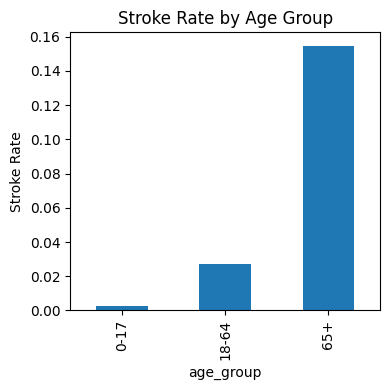

In [57]:
# 5. Pediatric vs Adult stroke: 연령대별 stroke 비율
#    0–17, 18–64, 65+ 로 나누어 보기

# 연령대 레이블 만들기
bins = [0, 17, 64, np.inf]
labels = ["0-17", "18-64", "65+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

# 각 연령대별 stroke 비율
age_grp_stroke = (
    df.groupby("age_group")["stroke"]
      .agg(["count", "sum", "mean"])  # count, stroke=1 개수, 비율
      .rename(columns={"sum": "stroke_1_count", "mean": "stroke_rate"})
)

print("✅ 연령대별 stroke 비율")
print(age_grp_stroke, "\n")

# 간단한 막대그래프(연령대별 stroke rate)
plt.figure(figsize=(4,4))
age_grp_stroke["stroke_rate"].plot(kind="bar")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by Age Group")
plt.tight_layout()
plt.show()

# 결과 해석
- 65+에서 뇌졸중 발생률이 압도적으로 높음
    - 나이는 가장 중요한 위험 요인
    - 가장 영향력이 높은 변수 1순위

# 추가로 생각할 점
- 질병 이유 자체가 다름
    - 성인/노인
        - 혈관 문제
    - 어린이
        - 선천적 질환, 출혈 등
- 연속값 그대로 사용
    - 연령 그룹 별도로 만들어서 추가 feature로도 넣어 볼만 함.

✅ stroke 그룹별 숫자형 변수 기초 통계
stroke                             0           1
age               count  4861.000000  249.000000
                  mean     41.971545   67.728193
                  std      22.291940   12.727419
                  min       0.080000    1.320000
                  25%      24.000000   59.000000
                  50%      43.000000   71.000000
                  75%      59.000000   78.000000
                  max      82.000000   82.000000
avg_glucose_level count  4861.000000  249.000000
                  mean    104.795513  132.544739
                  std      43.846069   61.921056
                  min      55.120000   56.110000
                  25%      77.120000   79.790000
                  50%      91.470000  105.220000
                  75%     112.830000  196.710000
                  max     267.760000  271.740000
bmi               count  4861.000000  249.000000
                  mean     28.799115   30.090361
                  std       7.777269    5.8

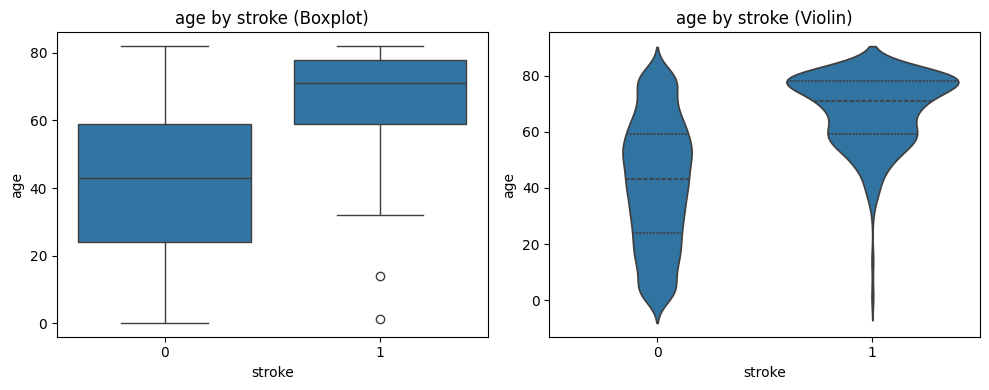

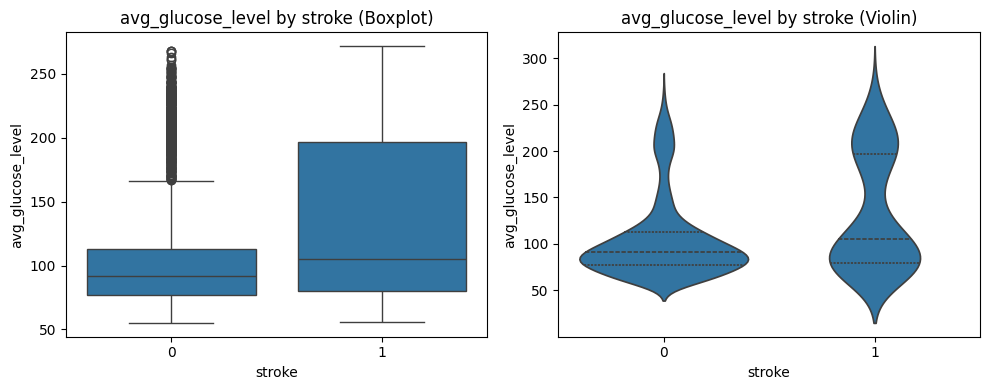

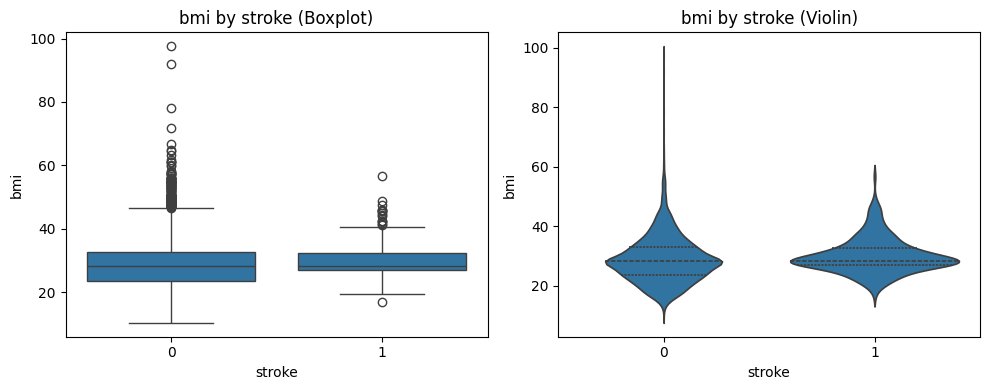

In [58]:
# 6. stroke=0 vs 1 에서 숫자형 변수 분포 비교
#    (기초 통계 + 박스/바이올린 플롯)
print("✅ stroke 그룹별 숫자형 변수 기초 통계")
group_stats = df.groupby("stroke")[num_cols].describe().T
print(group_stats, "\n")

# 박스/바이올린 플롯으로 분포 비교
for col in num_cols:
    plt.figure(figsize=(10,4))

    # 박스플롯: 중앙값, IQR 비교
    plt.subplot(1, 2, 1)
    sns.boxplot(x="stroke", y=col, data=df)
    plt.title(f"{col} by stroke (Boxplot)")

    # 바이올린 플롯: 분포 모양 비교
    plt.subplot(1, 2, 2)
    sns.violinplot(x="stroke", y=col, data=df, inner="quartile")
    plt.title(f"{col} by stroke (Violin)")

    plt.tight_layout()
    plt.show()

# 결과 해석
## age
- stroke = 1
    - 평균 67세
- stroke = 0
    - 평균 42세
### 핵심 패턴
- 나이가 들수록 stroke 위험도가 기하급수적으로 증가
    - 단순 crude effect 아님 → 가장 명확한 패턴

## avg_glucos_level
- stroke = 1
    - 평균 132 mg/dL
- stroke = 0
    - 평균 104 mg/dL
### 핵심 패턴
- 기본적으로 혈당이 높을수록 뇌졸중 위험이 커짐
    - 150 ~ 200, 200+ 구간이 stroke = 1 그룹이 훨씬 많음
    - 혈당도 강력한 위험 변수
### 생각해 봐야 할 점
- 혈당을 log transform 할지 robust scaling 할지 실험 필요
- Gradient Boosting 계열 모델에서는 그대로 사용

## BMI
- stroke = 1
    - 평균 28.79
- stroke = 0
    - 평균 30.09
### 핵심 패턴
- 그룹간 차이가 거의 없음
- p-value는 유의미 할 수 있지만 → 약한 변수 일것으로 보임
- 중요도 낮음 ~ 중간

In [59]:
# 3. stroke=1 그룹만 따로 모아서 기초 통계/비율 보기
#    (위험 요인 crude effect 감 잡기)
stroke1 = df[df["stroke"] == 1]

print("✅ stroke=1 그룹 숫자형 변수 기초 통계")
print(stroke1[num_cols].describe(), "\n")

print("✅ stroke=1 그룹에서 고혈압/심장질환/직업(children 등) 분포")
print("Hypertension\n", stroke1["hypertension"].value_counts(normalize=True).rename("ratio"))
print("\nHeart Disease\n", stroke1["heart_disease"].value_counts(normalize=True).rename("ratio"))
print("\nWork Type\n", stroke1["work_type"].value_counts(normalize=True).rename("ratio"))
print("\nSmoking Status\n", stroke1["smoking_status"].value_counts(normalize=True).rename("ratio"), "\n")

✅ stroke=1 그룹 숫자형 변수 기초 통계
              age  avg_glucose_level         bmi
count  249.000000         249.000000  249.000000
mean    67.728193         132.544739   30.090361
std     12.727419          61.921056    5.861877
min      1.320000          56.110000   16.900000
25%     59.000000          79.790000   27.000000
50%     71.000000         105.220000   28.100000
75%     78.000000         196.710000   32.500000
max     82.000000         271.740000   56.600000 

✅ stroke=1 그룹에서 고혈압/심장질환/직업(children 등) 분포
Hypertension
 hypertension
0    0.73494
1    0.26506
Name: ratio, dtype: float64

Heart Disease
 heart_disease
0    0.811245
1    0.188755
Name: ratio, dtype: float64

Work Type
 work_type
0    0.598394
1    0.261044
2    0.132530
3    0.008032
Name: ratio, dtype: float64

Smoking Status
 smoking_status
1    0.361446
3    0.281124
0    0.188755
2    0.168675
Name: ratio, dtype: float64 



## 그룹별 특징
- age
    - 59 ~ 78 구간 집중 (노년층)
- glucose
    - 평균: 132
    - 최대 271
    - 고혈당 분포 강함
- BMI
    - 평균: 30
    - 분포 안정적
- hypertension
    - 26%
- heart_disease
    - 18%
- work_type
    - Private가 많음
    - govt_job 소수 존재

## 정리
- stroke = 1의 패턴
    - 나이 ↑ + 혈당 ↑ + 고혈압 ↑ + 심장 질환 ↑
        - 전형적인 혈관성 질환 (ischemic stroke)
    

In [60]:
# 4. gender==3 (Other) 그룹 특성 보기
#    - hypertensive?
#    - glucose level?
#    - BMI?
other_g = df[df["gender"] == 3]

print("✅ gender=3 (Other) 그룹 요약")
print(f"- 인원수: {len(other_g)}")
if len(other_g) > 0:
    stroke_rate_other = other_g["stroke"].mean()
    htn_rate_other = other_g["hypertension"].mean()
    hd_rate_other = other_g["heart_disease"].mean()
    print(f"- stroke rate: {stroke_rate_other:.3f}")
    print(f"- hypertension rate: {htn_rate_other:.3f}")
    print(f"- heart disease rate: {hd_rate_other:.3f}")
    print("\n- 숫자형 변수 평균")
    print(other_g[num_cols].mean(), "\n")

✅ gender=3 (Other) 그룹 요약
- 인원수: 1
- stroke rate: 0.000
- hypertension rate: 0.000
- heart disease rate: 0.000

- 숫자형 변수 평균
age                   26.00
avg_glucose_level    143.33
bmi                   22.40
dtype: float64 



# 결과 해석
- 영향 거의 없음
    - LGBTIQ medical group에서 위험 인자가 다르게 나타날 수 있음
    - 의료적으로 의미는 있지만, 이 데이터 셋에서는 영향 미약

# 고려할 점
- 모델링 단계에서는 one-hot으로 포함
    - 모델이 과도하게 이 값에 만응 하지 않도록 regularizaiton 필요
        - LR

In [61]:
# 5. Unknown + children 그룹 interaction 보기
#    - work_type=children & smoking_status=Unknown
#    *** children_code, unknown_code 는 실제 데이터에 맞게 수정 필요 ***

children_code = 3
unknown_code  = 0

is_child = df["work_type"] == children_code
is_unknown_smoke = df["smoking_status"] == unknown_code

# (1) 어린이 & Unknown 흡연 상태인 그룹
child_unknown = df[is_child & is_unknown_smoke]
print("✅ work_type=children & smoking_status=Unknown 그룹 요약")
print(f"- 인원수: {len(child_unknown)}")
if len(child_unknown) > 0:
    print(f"- stroke rate: {child_unknown['stroke'].mean():.3f}")
    print(child_unknown[["age", "avg_glucose_level", "bmi"]].describe(), "\n")

# (2) age<18 & smoking_status=Unknown 교차 확인
age_child = df["age"] < 18
child_age_unknown = df[age_child & is_unknown_smoke]
print("✅ age<18 & smoking_status=Unknown 그룹 요약")
print(f"- 인원수: {len(child_age_unknown)}")
if len(child_age_unknown) > 0:
    print(f"- stroke rate: {child_age_unknown['stroke'].mean():.3f}\n")

✅ work_type=children & smoking_status=Unknown 그룹 요약
- 인원수: 618
- stroke rate: 0.003
              age  avg_glucose_level         bmi
count  618.000000         618.000000  618.000000
mean     6.226537          93.581084   19.904854
std      4.334257          25.477637    4.403849
min      0.080000          55.340000   10.300000
25%      2.000000          76.120000   17.100000
50%      5.000000          89.475000   18.800000
75%      9.000000         108.037500   21.400000
max     16.000000         219.810000   40.100000 

✅ age<18 & smoking_status=Unknown 그룹 요약
- 인원수: 682
- stroke rate: 0.003



# 결과 해석
## work_type = children & smoking=Uknown
- 인원수: 618
- stroke rate: 0.003 (0.3%)
- age 평균: 6.2세
    - 아이들 (유아 ~ 아동기)
- ave_glucose_level 평균: 93.58
    - 정상 범위
- BMI 퍙균: 19.9
    - 소아 평균 BMI로 자연스러운 값
## age < 18 & smoking = Unknown 그룹
- 인원수: 682
- stroke rate: 0.003 (0.3%)
- 유아·어린이·청소년은 흡연 여부를 묻기 어려우므로 Unknown이 자연스럽다
- 혈당/BMI/나이 분포가 work_type=children 그룹과 매우 유사함
- stroke가 극도로 낮음
    - 어린이집단 전체가 ‘stroke 거의 없음’이라는 분명한 경향을 보여줌

### 정리
- 이 두 그룹은 사실상 중복되는 소아 그룹
- 소아 그룹에서는 stroke 위험 요인 분석을 하는 것
    - 케이스가 너무 적음
    - 이것 자체는 무의미함
        - 유아기 stroke 2건에 대한 건 따로 확인 해야 할듯 
- 성인 분석과 분리해서 생각해야 함

### 생각해봐야 할 점
- SMOTE 사용 시 어린이 그룹은 절대 oversampling 되면 안 됨
    - 만약 소아 그룹도 SMOTE 대상에 섞이게 되면
        - stroke 1이 2~3명인 소아 그룹에서
        - 가짜 소아 stroke 환자가 대거 만들어짐
    - 해결
        - oversampling은 성인 데이터만 따로 분리해서 적용
        - 소아 데이터는 oversampling 금지
- 소아 그룹의 혈당·BMI 값은 성인과 scale이 다름
    - 스케일링 시에도 비정상적인 패턴 만들 수 있음
    - 해결
        - RobustScaler 적용 이전에
            - 성인 데이터만 스케일링
            - 소아는 예측시 스케일링 후 넣기
                - or rule-based
- 유아기 Stroke 2건
    - Pediatric stroke는 드문 질환
        - 한 케이스라도 임상적으로 의미 있음
    - 원인이 다름
        - 선천성 심장질환
        - 혈액 응고 이상
        - 감염
        - 외상
        - 선천적 혈관 질환 등
    - 다만, 모델에 그대로 넣으면 모델이 망가질 가능성 ↑
        - 모델 제외 + 별도 임상 분석
            - 예측에서는 신경 쓰지 않도록 만들고 별도의 임상적인 분석이 필요
                - 자료를 추가 하거나, 따로 분석해서 합치는 것?
                    - 방법 1. Rule-based + Adult ML 모델
                        - 가장 현실적이로 안전한 방법
                    - 방법 2. Ensemble: Pediatric Special Case Correction Layer
                        - 초음파·임상 예측 모델에서 많이 쓰는 방식
                    - 방법 3. Dual Model + Meta Switcher
                        - 연구 논문에서 가장 많이 쓰는 접근

In [64]:
# 5-1 소아 stroke 2건만 따로 추출
#     - 조건: age < 18, stroke == 1
peds_stroke = df[(df["age"] < 18) & (df["stroke"] == 1)]

print("✅ 소아(pediatric) stroke 케이스")
print(f"- 케이스 수: {len(peds_stroke)}\n")

# 케이스가 적으니까, 행 전체를 그대로 보여주기
# (한 사람당 어떤 값들을 가지고 있는지 한눈에 보기 위함)
print("▶ 소아 stroke 개별 케이스 (row 단위)")
print(peds_stroke[num_cols + cat_cols + ["id"]] if "id" in df.columns 
      else peds_stroke[num_cols + cat_cols])
print("\n")

✅ 소아(pediatric) stroke 케이스
- 케이스 수: 2

▶ 소아 stroke 개별 케이스 (row 단위)
       age  avg_glucose_level   bmi  gender  hypertension  heart_disease  \
162   1.32              70.37  28.1       1             0              0   
245  14.00              57.93  30.9       1             0              0   

     ever_married  work_type  Residence_type  smoking_status     id  
162             0          3               0               0  69768  
245             0          3               1               0  49669  




In [67]:
# 5-2 소아 stroke 케이스 간 공통점 찾기
#     - 숫자형: 평균/최솟값/최댓값 등 요약
#     - 범주형: 값 분포 (value_counts)


# 숫자형 변수 요약
print("✅ 소아 stroke 케이스 숫자형 요약 통계")
print(peds_stroke[num_cols].describe())  # count, mean, min, max 등
print("\n")

# 범주형 변수 요약
print("✅ 소아 stroke 케이스 범주형 분포")
for col in cat_cols:
    print(f"[{col}]")
    # value_counts(normalize=True)로 비율까지 함께 보기
    vc = peds_stroke[col].value_counts(dropna=False)
    ratio = (vc / len(peds_stroke) * 100).round(1)
    summary = pd.DataFrame({"count": vc, "ratio(%)": ratio})
    print(summary, "\n")

✅ 소아 stroke 케이스 숫자형 요약 통계
             age  avg_glucose_level        bmi
count   2.000000           2.000000   2.000000
mean    7.660000          64.150000  29.500000
std     8.966114           8.796408   1.979899
min     1.320000          57.930000  28.100000
25%     4.490000          61.040000  28.800000
50%     7.660000          64.150000  29.500000
75%    10.830000          67.260000  30.200000
max    14.000000          70.370000  30.900000


✅ 소아 stroke 케이스 범주형 분포
[gender]
        count  ratio(%)
gender                 
1           2     100.0 

[hypertension]
              count  ratio(%)
hypertension                 
0                 2     100.0 

[heart_disease]
               count  ratio(%)
heart_disease                 
0                  2     100.0 

[ever_married]
              count  ratio(%)
ever_married                 
0                 2     100.0 

[work_type]
           count  ratio(%)
work_type                 
3              2     100.0 

[Residence_type]
      

# 공통점
- 두 명 모두 여자
- 두 명 모두 고혈압/심장질환 없음.
    - 성인과는 반대
    - 선천성, 혈액질환, 감염, 외상 등 성인과 전혀 다른 메커니즘 가능성
- 두 명 모두 결혼 하지 않음
- 두 명 모두 children
- 두 명 모두 smoking_status = Unknown
- 나이는
    - 1.32세
    - 14세
- 혈당
    - 70.37
    - 57.93
- 나이
    - 28.1
    - 30.9

# 결론
- 소아 stroke 케이스는 성인과 완전히 다른 패턴을 갖는다.
- 고혈압, 심장질환, 당뇨, BMI 이런 것들과 무관하게 발생함.

In [69]:
# 5-3 소아 전체의 stroke의 상관관계

# 소아(18세 미만) 데이터만 따로 추출
child_df = df[df["age"] < 18].copy()

print(f"✅ 소아 데이터 수: {len(child_df)}")
print(f"   stroke=1 케이스 수: {child_df['stroke'].sum()}\n")

# 숫자형 변수와 stroke 상관관계
# - Pearson: 선형 관계
# - Spearman: 순위(비선형 포함) 기반 상관
print("📌 숫자형 변수 vs stroke 상관관계 (소아 그룹)")
for col in num_cols:
    # pearson
    pearson_corr, p_pearson = stats.pearsonr(child_df[col], child_df["stroke"])
    # spearman
    spearman_corr, p_spearman = stats.spearmanr(child_df[col], child_df["stroke"])

    print(f"[{col}]")
    print(f"  Pearson  : corr={pearson_corr:.3f}, p-value={p_pearson:.4g}")
    print(f"  Spearman : corr={spearman_corr:.3f}, p-value={p_spearman:.4g}\n")


# 범주형 변수와 stroke 관계 (카이제곱 검정)
print("📌 범주형 변수 vs stroke 카이제곱 검정 (소아 그룹)\n")

for col in cat_cols:
    ct = pd.crosstab(child_df[col], child_df["stroke"])

    # stroke가 한 값만 있으면(대부분 0) → 검정 불가
    if ct.shape[1] < 2:
        print(f"[{col}] -> stroke 값이 한 종류라서 카이제곱 검정 불가")
        continue

    chi2, p, dof, expected = stats.chi2_contingency(ct)

    print(f"[{col}] chi2={chi2:.3f}, p-value={p:.4g}, dof={dof}")
    print(ct)
    print()

✅ 소아 데이터 수: 856
   stroke=1 케이스 수: 2

📌 숫자형 변수 vs stroke 상관관계 (소아 그룹)
[age]
  Pearson  : corr=-0.008, p-value=0.813
  Spearman : corr=-0.011, p-value=0.7483

[avg_glucose_level]
  Pearson  : corr=-0.054, p-value=0.1146
  Spearman : corr=-0.066, p-value=0.05183

[bmi]
  Pearson  : corr=0.061, p-value=0.07334
  Spearman : corr=0.068, p-value=0.04764

📌 범주형 변수 vs stroke 카이제곱 검정 (소아 그룹)

[gender] chi2=0.549, p-value=0.4586, dof=1
stroke    0  1
gender        
0       438  0
1       416  2

[hypertension] chi2=0.000, p-value=1, dof=1
stroke          0  1
hypertension        
0             853  2
1               1  0

[heart_disease] chi2=0.000, p-value=1, dof=1
stroke           0  1
heart_disease        
0              853  2
1                1  0

[ever_married] chi2=0.000, p-value=1, dof=0
stroke          0  1
ever_married        
0             854  2

[work_type] chi2=0.493, p-value=0.9742, dof=4
stroke       0  1
work_type        
0          134  0
1           12  0
2            6  0
3 

# 숫자형
- age
    - p-value: 0.813, 0.75
- avg_glucose_level
    - p-value: 0.11, 0.05
- BMI
    - p-value: 0.07, 0.05

## 결론
- 통계적으로 소아 stroke는 숫자형 변수와 상관관계가 없다.

# 범주형
- gender
    - p-value: 0.45
- hypertension
    - p-value: 1.0
- heart_disease
    - p-value: 1.0
- ever_married
    - p-value: 1.0
- work_type
    - p-value: 0.97
- Residence_type
    - p-value: 1.0
- smoking_status
    - p-value: 0.91

## 결론
- 모든 변수에서 소아 stroke와 통계적 관련성이 없다.

# 핵심 결론
- 소아 stroke는 성인 stroke와다른 질병이다
- 머신러닝 모델에 넣으면 오히려 성인 모델 성능이 떨어짐

In [62]:
# 6. 숫자형 변수와 stroke의 상관관계 (Pearson / Spearman)
print("✅ 숫자형 변수 vs stroke 상관관계 (Pearson)")
print(df[["stroke"] + num_cols].corr(method="pearson"), "\n")

print("✅ 숫자형 변수 vs stroke 상관관계 (Spearman)")
print(df[["stroke"] + num_cols].corr(method="spearman"), "\n")

✅ 숫자형 변수 vs stroke 상관관계 (Pearson)
                     stroke       age  avg_glucose_level       bmi
stroke             1.000000  0.245257           0.131945  0.036110
age                0.245257  1.000000           0.238171  0.324296
avg_glucose_level  0.131945  0.238171           1.000000  0.166876
bmi                0.036110  0.324296           0.166876  1.000000 

✅ 숫자형 변수 vs stroke 상관관계 (Spearman)
                     stroke       age  avg_glucose_level       bmi
stroke             1.000000  0.249531           0.082541  0.050870
age                0.249531  1.000000           0.145168  0.362859
avg_glucose_level  0.082541  0.145168           1.000000  0.111914
bmi                0.050870  0.362859           0.111914  1.000000 



# 결과 해석
- age 
    - 0.24 ~ 0.25
    - 압도적인 상관관계
- avg_glucose_level
    - 0.08 ~ 0.13
    - 분포 차이가 있긴 하지만, linearly 강한 상관관계는 아님
- BMI
    - 0 ~ 0.05
    - 영향 매우 약함

# 중요도 순서
1. age
2. hypertesion
3. heart disease
4. avg_glucose_level
5. smoking_status
6. BMI

In [63]:
# 7. 범주형 변수 vs stroke: 카이제곱 검정
#    - 어떤 범주형 변수가 stroke와 유의미하게 관련 있는지 보는 단계
print("✅ 범주형 변수 vs stroke 카이제곱 검정 결과")
for col in cat_cols:
    ct = pd.crosstab(df[col], df["stroke"])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"[{col}] chi2={chi2:.2f}, p-value={p:.4g}, dof={dof}")
    # p-value가 0.05보다 작으면 통계적으로 유의미한 관련성이 있다고 해석


✅ 범주형 변수 vs stroke 카이제곱 검정 결과
[gender] chi2=0.47, p-value=0.7895, dof=2
[hypertension] chi2=81.61, p-value=1.662e-19, dof=1
[heart_disease] chi2=90.26, p-value=2.089e-21, dof=1
[ever_married] chi2=58.92, p-value=1.639e-14, dof=1
[work_type] chi2=49.16, p-value=5.398e-10, dof=4
[Residence_type] chi2=1.08, p-value=0.2983, dof=1
[smoking_status] chi2=29.15, p-value=2.085e-06, dof=3


# 결과 해석
- gender
    - p-vlaue: 0.789
    - 성별 영향 없음
- hypertension
    - p-vlaue: 1e-19
    - 매우 강함
- heart_disease
    - p-vlaue: 2e-21
    - 매우 강함
- ever_married
    - p-vlaue: 1e-14
    - 결혼 여부도 의미가 있음
- work_type
    - p-vlaue: 5e-10
    - 직업 유형 영향 있음
- residence_type
    - p-vlaue: 0.298
    - 도시/농촌 영향 없음
- smoking_status
    - p-vlaue: 2e-6
    - 흡연 정보 의미 있음

# 정리
- stroke 관계 있음
    - 혈압/심장질환/결혼/직업/흡연
- stroke 관계 없음
    - 성별/거주 지역

# Logistic Regression 모델

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [76]:
# 성인(adult) 그룹만 사용 (age >= 18)
adult_df = df[df["age"] >= 18].copy()

# 타깃 변수
target = "stroke"

# id 컬럼이 있으면 제거 (모델 학습에 필요 없음)
drop_cols = [target]
if "id" in adult_df.columns:
    drop_cols.append("id")

X = adult_df.drop(columns=drop_cols)
y = adult_df[target]

# 숫자형 / 범주형 컬럼 구분
num_cols = ["age", "avg_glucose_level", "bmi"]  # 연속형 변수
# 나머지는 모두 범주형으로 처리 (0/1 포함)
cat_cols = [c for c in X.columns if c not in num_cols]

# 전처리 파이프라인
# - 숫자형: RobustScaler (이상치에 덜 민감)
# - 범주형: One-Hot 인코딩
preprocess = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Train / Test 나누기 (성인 그룹 안에서만)-
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,          # 불균형 클래스 비율 유지
    random_state=42
)

In [77]:
# Logistic Regression 모델
logistic_clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",   # 불균형 보정
            solver="lbfgs"
        ))
    ]
)

logistic_clf.fit(X_train, y_train)

y_pred_lr = logistic_clf.predict(X_test)
y_proba_lr = logistic_clf.predict_proba(X_test)[:, 1]

print("✅ Logistic Regression 성능 (성인 그룹)")
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("-" * 60)

✅ Logistic Regression 성능 (성인 그룹)
              precision    recall  f1-score   support

           0      0.973     0.716     0.825       802
           1      0.126     0.673     0.213        49

    accuracy                          0.713       851
   macro avg      0.550     0.695     0.519       851
weighted avg      0.924     0.713     0.789       851

ROC-AUC: 0.8021782278996387
------------------------------------------------------------


# 결과 해석 
- 전체 accuracy = 0.713 (71.3%)
# 핵심 문제
- stroke = 1 케이스가 매우 적어서 모델이 제대로 학습하지 못함
- 그래서 1이라고 맞출 때 거의 다 틀림 → precision 매우 낮음
# 괜찮은 점
- Recall = 1: 0.673
    - 모델이 stroke 환자를 찾아내는 능력은 꽤 괜찮음
# ROC-AUC
- 0.80 (80%)
- 모델이 전체적으로 분류할 능력은 있음

In [78]:
# Random Forest 모델
rf_clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            class_weight="balanced_subsample",  # 불균형 보정
            n_jobs=-1
        ))
    ]
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("✅ Random Forest 성능 (성인 그룹)")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("-" * 60)

✅ Random Forest 성능 (성인 그룹)
              precision    recall  f1-score   support

           0      0.943     0.994     0.968       802
           1      0.167     0.020     0.036        49

    accuracy                          0.938       851
   macro avg      0.555     0.507     0.502       851
weighted avg      0.898     0.938     0.914       851

ROC-AUC: 0.760496717390198
------------------------------------------------------------


# 결과 해석
- accuracy = 0.938
    - 정상 환자가 너무 많아서 생긴 착시
- stroke = 1 성능
    - 0.167
    - 거의 stroke 환자를 찾지 못함 (Recall = 0.02 (2%))
    - 모델이 완전히 클래스 불균형에 휩쓸린 상태
- ROC-AUC = 0.76
    - 전체적인 분류력은 있지만, 실전 사용은 위험함.

# 2차 모델 구축

In [80]:
# !pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]d-learn]


In [81]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# SMOTE + 파이프라인 (imblearn)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [98]:
# 성인(adult) 그룹만 사용 (age >= 18)
adult_df = df[df["age"] >= 18].copy()

target = "stroke"

# id 컬럼이 있으면 제거 (모델 학습에 필요 없는 식별자)
drop_cols = [target]
if "id" in adult_df.columns:
    drop_cols.append("id")

X = adult_df.drop(columns=drop_cols)
y = adult_df[target]

In [100]:
# 숫자형 / 범주형 컬럼 구분
num_cols = ["age", "avg_glucose_level", "bmi"]  # 연속형 변수
# 나머지는 모두 범주형으로 처리 (0/1 포함)
cat_cols = [c for c in X.columns if c not in num_cols]

# 전처리 파이프라인
# - 숫자형: RobustScaler (이상치에 덜 민감)
# - 범주형: One-Hot 인코딩

preprocess = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Train / Test 나누기 (성인 그룹 안에서만)
# - SMOTE는 반드시 train에만 적용해야 하므로
#   split을 먼저 해주고, 파이프라인 안에서 train에만 적용되게 함
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,          # 불균형 비율 유지
    random_state=42
)

# SMOTE 설정 (소수 클래스 = stroke=1 을 synthetic하게 늘려주는 역할)
smote = SMOTE(random_state=42)

In [97]:
# Logistic Regression + SMOTE 파이프라인
logistic_clf = ImbPipeline(
    steps=[
        ("preprocess", preprocess),   # 1) 전처리 (스케일링 + 원핫)
        ("smote", smote),             # 2) train 데이터에만 SMOTE oversampling
        ("model", LogisticRegression(
            max_iter=1000,
            # SMOTE로 이미 클래스 밸런스를 맞춰주므로
            # class_weight는 일단 사용하지 않아도 됨 (원하면 'balanced'로 테스트 가능)
            solver="lbfgs"
        ))
    ]
)

logistic_clf.fit(X_train, y_train)

y_pred_lr = logistic_clf.predict(X_test)
y_proba_lr = logistic_clf.predict_proba(X_test)[:, 1]

print("✅ Logistic Regression + SMOTE 성능 (성인 그룹)")
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("-" * 60)

✅ Logistic Regression + SMOTE 성능 (성인 그룹)
              precision    recall  f1-score   support

           0      0.986     0.748     0.851       972
           1      0.140     0.800     0.239        50

    accuracy                          0.750      1022
   macro avg      0.563     0.774     0.545      1022
weighted avg      0.945     0.750     0.821      1022

ROC-AUC: 0.843477366255144
------------------------------------------------------------


/home/kdt_43/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [101]:
# Random Forest + SMOTE 파이프라인
rf_clf = ImbPipeline(
    steps=[
        ("preprocess", preprocess),   # 1) 전처리
        ("smote", smote),             # 2) SMOTE oversampling
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            n_jobs=-1
            # SMOTE가 이미 데이터를 balance시키므로
            # 여기서는 class_weight를 기본값(None)으로 두고 시작
        ))
    ]
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("✅ Random Forest + SMOTE 성능 (성인 그룹)")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("-" * 60)

/home/kdt_43/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Random Forest + SMOTE 성능 (성인 그룹)
              precision    recall  f1-score   support

           0      0.943     0.963     0.952       802
           1      0.062     0.041     0.049        49

    accuracy                          0.910       851
   macro avg      0.503     0.502     0.501       851
weighted avg      0.892     0.910     0.900       851

ROC-AUC: 0.7626342307496564
------------------------------------------------------------


# 3차 모델 구축
## 전체 데이터 사용

In [86]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# imblearn - SMOTE & 파이프라인
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [87]:
target = "stroke"

drop_cols = [target]
if "id" in df.columns:   # id 컬럼 있으면 제거
    drop_cols.append("id")

X = df.drop(columns=drop_cols)
y = df[target]

# 숫자형 / 범주형 컬럼 구분
num_cols = ["age", "avg_glucose_level", "bmi"]    # 연속형 변수
# 나머지는 모두 범주형 취급 (0/1 포함)
cat_cols = ["gender", "hypertension", "heart_disease", 
            "ever_married", "work_type", "Residence_type", 
            "smoking_status"]

# 전처리 파이프라인
# - 숫자형: RobustScaler
# - 범주형: One-Hot 인코딩
preprocess = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Train / Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,        # stroke 비율 유지
    random_state=42
)

# SMOTE 설정 (소수 클래스 = stroke=1 증가)
smote = SMOTE(random_state=42)

In [88]:
# Logistic Regression + SMOTE (전체 데이터)
logistic_clf = ImbPipeline(
    steps=[
        ("preprocess", preprocess),   # 1) 스케일링 + 원핫
        ("smote", smote),             # 2) train 데이터에만 SMOTE 적용
        ("model", LogisticRegression(
            max_iter=1000,
            solver="lbfgs"
        ))
    ]
)

logistic_clf.fit(X_train, y_train)

y_pred_lr = logistic_clf.predict(X_test)
y_proba_lr = logistic_clf.predict_proba(X_test)[:, 1]

print("✅ Logistic Regression + SMOTE 성능 (전체 데이터)")
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("-" * 60)

✅ Logistic Regression + SMOTE 성능 (전체 데이터)
              precision    recall  f1-score   support

           0      0.986     0.748     0.851       972
           1      0.140     0.800     0.239        50

    accuracy                          0.750      1022
   macro avg      0.563     0.774     0.545      1022
weighted avg      0.945     0.750     0.821      1022

ROC-AUC: 0.843477366255144
------------------------------------------------------------


/home/kdt_43/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [89]:
# 5-2. Random Forest + SMOTE (전체 데이터)
rf_clf = ImbPipeline(
    steps=[
        ("preprocess", preprocess),
        ("smote", smote),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("✅ Random Forest + SMOTE 성능 (전체 데이터)")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("-" * 60)

/home/kdt_43/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Random Forest + SMOTE 성능 (전체 데이터)
              precision    recall  f1-score   support

           0      0.956     0.968     0.962       972
           1      0.184     0.140     0.159        50

    accuracy                          0.928      1022
   macro avg      0.570     0.554     0.561      1022
weighted avg      0.919     0.928     0.923      1022

ROC-AUC: 0.7665432098765432
------------------------------------------------------------


# ROC 곡선 + AUC 계산

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

# Logistic Regression ROC 곡선

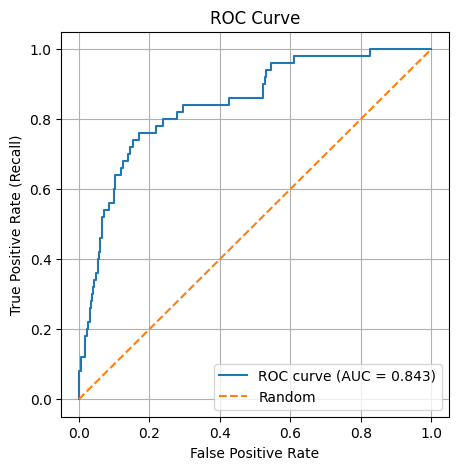

In [92]:
# y_test : 실제 레이블 (0/1)
# y_proba: 모델이 예측한 stroke=1 확률

# ROC 곡선 계산
# - fpr: False Positive Rate
# - tpr: True Positive Rate (= recall)
# - thresholds: 각 점에서의 decision 기준값
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# Random Forest ROC 곡선

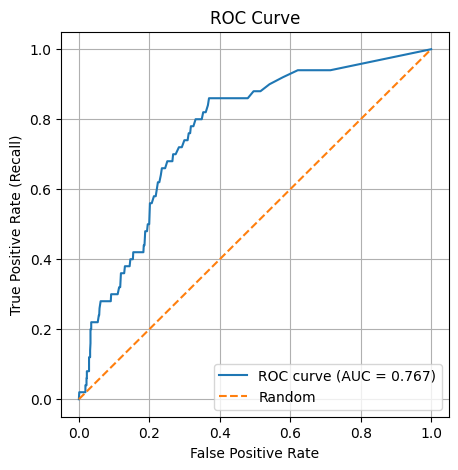

In [93]:
# y_test : 실제 레이블 (0/1)
# y_proba: 모델이 예측한 stroke=1 확률

# ROC 곡선 계산
# - fpr: False Positive Rate
# - tpr: True Positive Rate (= recall)
# - thresholds: 각 점에서의 decision 기준값
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [94]:
# ROC 곡선에서 목표 recall(예: 0.8)에 가장 가까운 threshold 찾기
target_recall = 0.80

# tpr(=recall)과 target_recall의 차이가 가장 작은 index 선택
best_idx = np.argmin(np.abs(tpr - target_recall))
best_thr = thresholds[best_idx]
best_recall = tpr[best_idx]
best_fpr = fpr[best_idx]

print(f"🎯 목표 recall {target_recall:.2f} 에 가장 가까운 threshold")
print(f"- threshold ≈ {best_thr:.3f}")
print(f"- recall(=TPR) ≈ {best_recall:.3f}")
print(f"- FPR ≈ {best_fpr:.3f}")

# 이 threshold로 최종 예측해보기
y_pred_best = (y_proba_lr >= best_thr).astype(int)
prec_best, rec_best, f1_best, _ = precision_recall_fscore_support(
    y_test, y_pred_best, labels=[1], average=None
)
print("\n✅ 선택한 threshold에서 stroke=1 성능")
print(f"- precision_1 = {prec_best[0]:.3f}")
print(f"- recall_1    = {rec_best[0]:.3f}")
print(f"- f1_1        = {f1_best[0]:.3f}")


🎯 목표 recall 0.80 에 가장 가까운 threshold
- threshold ≈ 0.077
- recall(=TPR) ≈ 0.800
- FPR ≈ 0.331

✅ 선택한 threshold에서 stroke=1 성능
- precision_1 = 0.075
- recall_1    = 0.980
- f1_1        = 0.139


In [95]:
# ROC 곡선에서 목표 recall(예: 0.8)에 가장 가까운 threshold 찾기
target_recall = 0.80

# tpr(=recall)과 target_recall의 차이가 가장 작은 index 선택
best_idx = np.argmin(np.abs(tpr - target_recall))
best_thr = thresholds[best_idx]
best_recall = tpr[best_idx]
best_fpr = fpr[best_idx]

print(f"🎯 목표 recall {target_recall:.2f} 에 가장 가까운 threshold")
print(f"- threshold ≈ {best_thr:.3f}")
print(f"- recall(=TPR) ≈ {best_recall:.3f}")
print(f"- FPR ≈ {best_fpr:.3f}")

# 이 threshold로 최종 예측해보기
y_pred_best = (y_proba_rf >= best_thr).astype(int)
prec_best, rec_best, f1_best, _ = precision_recall_fscore_support(
    y_test, y_pred_best, labels=[1], average=None
)
print("\n✅ 선택한 threshold에서 stroke=1 성능")
print(f"- precision_1 = {prec_best[0]:.3f}")
print(f"- recall_1    = {rec_best[0]:.3f}")
print(f"- f1_1        = {f1_best[0]:.3f}")

🎯 목표 recall 0.80 에 가장 가까운 threshold
- threshold ≈ 0.077
- recall(=TPR) ≈ 0.800
- FPR ≈ 0.331

✅ 선택한 threshold에서 stroke=1 성능
- precision_1 = 0.110
- recall_1    = 0.800
- f1_1        = 0.194
